## Auto ML: dataset Titanic 

### Imports das bibliotecas

In [1]:
import numpy as np
import matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

matplotlib.style.use(['seaborn'])
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [2]:
print ('Matplotlib version: ', matplotlib.__version__) 
print ('Numpy version: ', np.__version__) 
print ('Pandas version: ', pd.__version__)

Matplotlib version:  3.2.1
Numpy version:  1.17.4
Pandas version:  0.24.2


### Carregamento dos dados

In [3]:
df = pd.read_csv('data/titanic.csv')
print('Dataset shaoe: {}'.format(df.shape))

Dataset shaoe: (891, 12)


### Descrição do conjunto de dados

Esse conjunto contém dados dos passageiros do Titanic. Em 15 de abril de 1912, durante sua viagem inaugural, o RMS Titanic afundou após colidir com um iceberg. Infelizmente, não havia botes salva-vidas suficientes para todos a bordo, resultando na morte de 1502 dos 2224 passageiros e tripulantes.

### Características do conjunto

- PassengerId: identificador do passageiro;
- Survived: sobrevivência. 0= não e 1= sim;
- Pclass: classe da passagem. 1= primeira classe, 2= segunda e 3= terceira;
- Name: nome do passageiro;
- Sex: sexo;
- Age: idade;
- SibSp: número de irmãos/cônjuges a bordo;
- Parch: número de pais/filhos a bordo;
- Ticket: número da passagem;
- Fare: valor da tarifa;
- Cabin: número da cabine;
- Embarked: local de embarque. C= Cherbourg, Q= Queenstown, S= Southampton

In [4]:
print('Colunas presentes: {}'.format(df.columns.values))

Colunas presentes: ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


### Remove a coluna id dos dados

In [6]:
dfPassengerId = df['PassengerId']
df.drop(['PassengerId'], axis=1, inplace=True)

### Exploração dos dados

In [7]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Moubarek, Master. Halim Gonios (""William George"")",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


### Pré-processamento dos dados

#### Renomeia as colunas

In [9]:
cols = {
    'Survived': 'sobrevivente',
    'Pclass': 'classe',
    'Name': 'nome',
    'Sex': 'sexo',
    'Age': 'idade',
    'SibSp': 'irmaosEconjunges',
    'Parch': 'paisEfilhos',
    'Ticket': 'passagem',
    'Fare': 'tarifa',
    'Cabin': 'cabine',
    'Embarked': 'embarque'
}

df = df.rename(columns=cols)

#### Valores faltantes

In [10]:
print('Valores faltantes treino: \n{}'.format(df.isnull().mean()* 100))

Valores faltantes treino: 
sobrevivente         0.000000
classe               0.000000
nome                 0.000000
sexo                 0.000000
idade               19.865320
irmaosEconjunges     0.000000
paisEfilhos          0.000000
passagem             0.000000
tarifa               0.000000
cabine              77.104377
embarque             0.224467
dtype: float64


#### Tratando os dados nulos

In [11]:
df.drop(['cabine'], axis=1, inplace=True)

In [12]:
cols = ['idade', 'tarifa']

for c in cols:
    df[c] = df[c].fillna(df[c].mean())

In [13]:
cols = ['sobrevivente', 'embarque']

for c in cols:
    df[c] = df[c].fillna(df[c].mode()[0])

#### Valores duplicados

In [14]:
print('Valores duplicados treino: {}'.format(df.duplicated().mean()*100))

Valores duplicados treino: 0.0


#### Conversão de valores

In [15]:
cols = ['idade', 'sobrevivente']

for c in cols:
    df[c] = df[c].astype(int)

#### Engenharia de recursos

In [16]:
print('Impacto da Classe no conjunto de dados:\n')
df[['classe', 'sobrevivente']].groupby(['classe'], as_index=False).mean().sort_values(by='sobrevivente', 
                                                                                               ascending=False)

Impacto da Classe no conjunto de dados:



,classe,sobrevivente
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [17]:
print('Impacto do sexo no conjunto de dados:\n')
df[['sexo', 'sobrevivente']].groupby(['sexo'], as_index=False).mean().sort_values(by='sobrevivente', ascending=False)

Impacto do sexo no conjunto de dados:



,sexo,sobrevivente
0,female,0.742038
1,male,0.188908


In [18]:
df['tamanhoFamilia'] = df['paisEfilhos'] + df['irmaosEconjunges'] + 1
                                                                                                 
print('Impacto do tamanho da família no conjunto de dados:\n')
df[['tamanhoFamilia', 'sobrevivente']].groupby(['tamanhoFamilia'], 
                                                                as_index=False).mean().sort_values(by='sobrevivente', 
                                                                                                   ascending=False)

Impacto do tamanho da família no conjunto de dados:



,tamanhoFamilia,sobrevivente
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [19]:
print('Impacto do local de embarque no conjunto de dados:\n')
df[['embarque', 'sobrevivente']].groupby(['embarque'], as_index=False).mean().sort_values(by='sobrevivente', 
                                                                                                     ascending=False)

Impacto do local de embarque no conjunto de dados:



,embarque,sobrevivente
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [20]:
df['faixaIdade'] = pd.cut(df['idade'], 5)

print('Impacto da idade no conjunto de dados:\n')
df[['faixaIdade', 'sobrevivente']].groupby(['faixaIdade'], as_index=False).mean().sort_values(by='sobrevivente', 
                                                                                                           ascending=False)

Impacto da idade no conjunto de dados:



,faixaIdade,sobrevivente
0,"(-0.08, 16.0]",0.550000
3,"(48.0, 64.0]",0.434783
2,"(32.0, 48.0]",0.403226
1,"(16.0, 32.0]",0.344762
4,"(64.0, 80.0]",0.090909


In [21]:
df['estaSozinho'] = 0
df.loc[df['tamanhoFamilia'] == 1, 'estaSozinho'] = 1

In [22]:
df['idade*classe'] = df['idade'] * df['classe']

### Visualização dos dados

In [23]:
df.head()

,sobrevivente,classe,nome,sexo,idade,irmaosEconjunges,paisEfilhos,passagem,tarifa,embarque,tamanhoFamilia,faixaIdade,estaSozinho,idade*classe
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,2,"(16.0, 32.0]",0,66
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,2,"(32.0, 48.0]",0,38
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,1,"(16.0, 32.0]",1,78
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,2,"(32.0, 48.0]",0,35
4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,1,"(32.0, 48.0]",1,105


#### Sobrevivente por idade

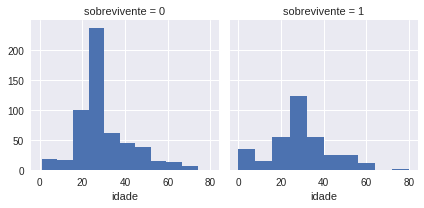

In [24]:
g = sns.FacetGrid(df, col='sobrevivente')
g.map(plt.hist, 'idade', bins=10)

#### Sobrevivente por classe

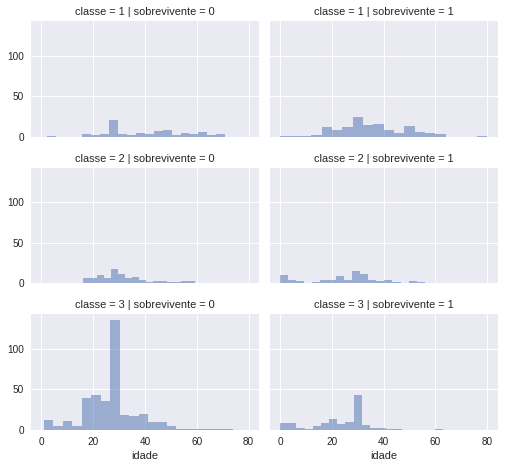

In [25]:
grid = sns.FacetGrid(df, col='sobrevivente', row='classe', size=2.2, aspect=1.6)
grid.map(plt.hist, 'idade', alpha=.5, bins=20)
grid.add_legend()

#### Correlacionando Recursos Categóricos

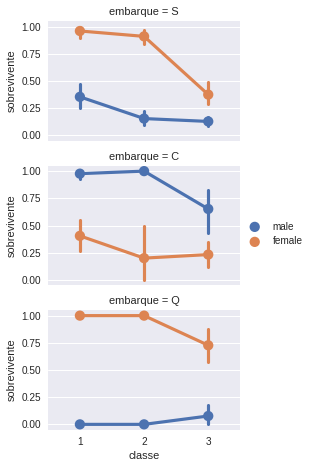

In [26]:
grid = sns.FacetGrid(df, row='embarque', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'classe', 'sobrevivente', 'sexo', palette='deep')
grid.add_legend()

#### Correlacionando Recursos Categóricos e Numéricos

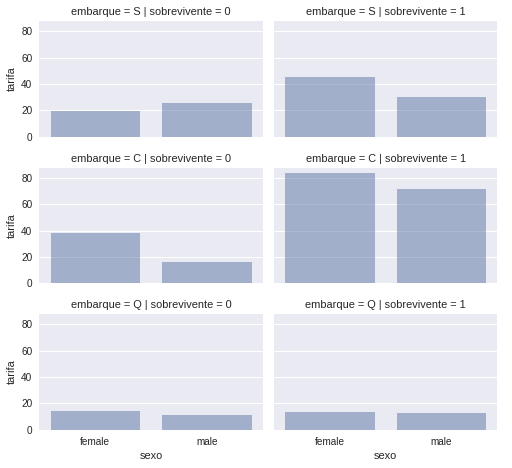

In [27]:
grid = sns.FacetGrid(df, row='embarque', col='sobrevivente', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'sexo', 'tarifa', alpha=.5, ci=None)
grid.add_legend()

#### Limpeza dos dados

In [28]:
df['sexo'] = df['sexo'].map({'female': 0, 'male': 1}).astype(int)

In [29]:
df['embarque'] = df['embarque'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

In [30]:
df.loc[df['idade'] <= 16, 'idade'] = 0
df.loc[df['idade'] <= 32, 'idade'] = 1
df.loc[df['idade'] <= 48, 'idade'] = 2
df.loc[df['idade'] <= 64, 'idade'] = 3
df.loc[df['idade'] > 64,  'idade'] = 4

#### Seleção de recursos

In [31]:
df.drop(['nome', 'tarifa', 'passagem', 'faixaIdade'], axis=1, inplace=True)

In [32]:
df.head()

,sobrevivente,classe,sexo,idade,irmaosEconjunges,paisEfilhos,embarque,tamanhoFamilia,estaSozinho,idade*classe
0,0,3,1,3,1,0,0,2,0,66
1,1,1,0,3,1,0,1,2,0,38
2,1,3,0,3,0,0,0,1,1,78
3,1,1,0,3,1,0,0,2,0,35
4,0,3,1,3,0,0,0,1,1,105


### Correlação de Pearson

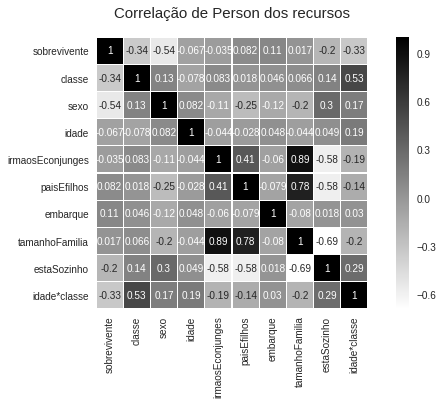

In [33]:
plt.figure(figsize=(10, 5))
plt.title('Correlação de Person dos recursos', y=1.05, size=15)
sns.heatmap(df.corr(), linewidths=0.1, vmax=1.0, square=True, cmap=plt.cm.gist_yarg, linecolor='white', annot=True)

### AutoML

In [34]:
from tpot import TPOTClassifier

#### Separação dos dados

In [35]:
from sklearn.model_selection import KFold

In [36]:
y = df['sobrevivente']
X = df.drop(['sobrevivente'], axis=1)

In [38]:
cv = KFold(n_splits=5, shuffle=True)

for train_index, test_index in cv.split(X):
    X_train, X_test, y_train, y_test = X.loc[train_index], X.loc[test_index], y.loc[train_index], y.loc[test_index]

#### Definição do modelo

In [41]:
pipeline_optimizer = TPOTClassifier(generations=20, 
                                    population_size=20,
                                    scoring='roc_auc',
                                    cv=5, 
                                    random_state=42, 
                                    verbosity=3,
                                    n_jobs=-1                                   
                                   )

#### Treino

In [42]:
pipeline_optimizer.fit(X_train, y_train)

31 operators have been imported by TPOT.


_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True.
_pre_test decorator: _random_mutation_operator: num_test=0 Expected n_neighbors <= n_samples,  but n_samples = 50, n_neighbors = 74.
Generation 1 - Current Pareto front scores:
-1	0.8695725505624525	RandomForestClassifier(input_matrix, RandomForestClassifier__bootstrap=True, RandomForestClassifier__criterion=gini, RandomForestClassifier__max_features=0.25, RandomForestClassifier__min_samples_leaf=5, RandomForestClassifier__min_samples_split=12, RandomForestClassifier__n_estimators=100)

Generation 2 - Current Pareto front scores:
-1	0.8700195255580813	RandomForestClassifier(input_matrix, RandomForestClassifier__bootstrap=False, RandomForestClassifier__criterion=gini, RandomForestClassifier__max_features=0.7000000000000001, RandomForestClassifier__min_

_pre_test decorator: _random_mutation_operator: num_test=0 Expected n_neighbors <= n_samples,  but n_samples = 50, n_neighbors = 79.
_pre_test decorator: _random_mutation_operator: num_test=0 '(slice(None, None, None), 0)' is an invalid key.
_pre_test decorator: _random_mutation_operator: num_test=1 Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty..
_pre_test decorator: _random_mutation_operator: num_test=0 feature_names mismatch: ['classe', 'sexo', 'idade', 'irmaosEconjunges', 'paisEfilhos', 'embarque', 'tamanhoFamilia', 'estaSozinho', 'idade*classe'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8']
expected sexo, embarque, idade*classe, irmaosEconjunges, estaSozinho, tamanhoFamilia, classe, paisEfilhos, idade in input data
training data did not have the following fields: f0, f2, f6, f5, f3, f7, f4, f1, f8.
Generation 11 - Current Pareto front scores:
-1	0.8775783936585648	RandomForestClassifier(input_matrix, RandomForestClassifier__bootstrap=False, RandomFore

_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True.
_pre_test decorator: _random_mutation_operator: num_test=0 feature_names mismatch: ['classe', 'sexo', 'idade', 'irmaosEconjunges', 'paisEfilhos', 'embarque', 'tamanhoFamilia', 'estaSozinho', 'idade*classe'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8']
expected sexo, embarque, idade*classe, irmaosEconjunges, estaSozinho, tamanhoFamilia, classe, paisEfilhos, idade in input data
training data did not have the following fields: f0, f2, f6, f5, f3, f7, f4, f1, f8.
Generation 17 - Current Pareto front scores:
-1	0.8783612373958152	RandomForestClassifier(input_matrix, RandomForestClassifier__bootstrap=False, RandomForestClassifier__criterion=entropy, RandomForestClassifier__max_features=0.35000000000000003, RandomForestClassifier__min_samples_leaf=7, RandomForestClassifier__min_s

TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
               disable_update_check=False, early_stop=None, generations=20,
               max_eval_time_mins=5, max_time_mins=None, memory=None,
               mutation_rate=0.9, n_jobs=-1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=20,
               random_state=42, scoring='roc_auc', subsample=1.0, template=None,
               use_dask=False, verbosity=3, warm_start=False)

#### Exportando o modelo

In [43]:
pipeline_optimizer.export('tpot_exported_pipeline.py')

#### Avaliando o modelo

In [44]:
print(pipeline_optimizer.score(X_test, y_test))

0.8124198832075202
